## 0. Описание задачи
У нас есть данные о том, что делают игроки в начале матче, возможно, с их помощью можно понять, как какие действия влияют на результат матча и предсказывать этот результат.

Импортируем необходимые библиотеки и считываем датасет

In [1]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline 

## 1. Считывание данных

In [2]:
data = pd.read_csv('./Master_Ranked_Games.csv',index_col=[0])
data.reset_index(drop=True, inplace=True)
print(data.shape)

(107125, 49)


In [3]:
data.head()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1429,0,1,1,0,0,0,0,0,4,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,1313,0,0,1,0,0,0,0,0,3,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,1660,1,0,0,1,1,1,1,1,9,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,984,1,1,1,0,1,0,2,0,5,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,1437,0,1,1,0,1,0,2,0,3,...,39,71794,45798,565,68,13.6,150,7,47523,47150


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameDuraton              107125 non-null  int64  
 1   blueWins                 107125 non-null  int64  
 2   blueFirstBlood           107125 non-null  int64  
 3   blueFirstTower           107125 non-null  int64  
 4   blueFirstBaron           107125 non-null  int64  
 5   blueFirstDragon          107125 non-null  int64  
 6   blueFirstInhibitor       107125 non-null  int64  
 7   blueDragonKills          107125 non-null  int64  
 8   blueBaronKills           107125 non-null  int64  
 9   blueTowerKills           107125 non-null  int64  
 10  blueInhibitorKills       107125 non-null  int64  
 11  blueWardPlaced           107125 non-null  int64  
 12  blueWardkills            107125 non-null  int64  
 13  blueKills                107125 non-null  int64  
 14  blue

## 2. Визуализация


In [5]:
data.describe()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,...,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000
mean,1432.977914,0.495132,0.507025,0.513410,0.236229,0.408047,0.387715,1.359356,0.297018,4.345475,...,39.807365,68789.821620,47875.980285,501.132966,64.695561,12.939112,125.359683,5.688831,24547.786763,36884.671888
std,436.506952,0.499979,0.499953,0.499822,0.424766,0.491474,0.487231,1.256974,0.535069,3.401828,...,28.805782,37648.964189,16455.077811,180.010409,15.166821,3.033364,66.746287,3.640699,15510.255865,27034.549770
min,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,19.000000,40494.000000,36127.000000,382.000000,55.000000,11.000000,84.000000,3.000000,13297.000000,12583.000000
50%,1420.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,35.000000,63885.000000,47955.000000,517.000000,66.000000,13.200000,128.000000,5.000000,21455.000000,32486.000000
75%,1735.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,...,53.000000,90554.000000,59133.000000,627.000000,75.000000,15.000000,171.000000,8.000000,32367.000000,57346.000000
max,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,...,225.000000,341957.000000,141692.000000,1338.000000,145.000000,29.000000,488.000000,29.000000,188817.000000,191193.000000


In [6]:
cor_matrix = data.corr()
cor_matrix

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameDuraton,1.000000,-0.020653,0.001113,0.046164,0.402575,0.091122,0.156593,0.494489,0.497172,0.391131,...,0.366323,0.693182,0.772841,0.900673,0.755967,0.755967,0.785703,0.376685,0.718363,0.627111
blueWins,-0.020653,1.000000,0.208979,0.472211,0.369585,0.276402,0.668425,0.455406,0.355497,0.723008,...,-0.332346,-0.173848,-0.275944,-0.109334,-0.221730,-0.221730,-0.247116,-0.397022,-0.220708,-0.557780
blueFirstBlood,0.001113,0.208979,1.000000,0.220634,0.050738,0.142845,0.157705,0.136477,0.043951,0.190511,...,-0.086768,-0.041774,-0.077770,-0.034696,-0.051810,-0.051810,-0.056249,-0.126558,-0.035060,-0.143356
blueFirstTower,0.046164,0.472211,0.220634,1.000000,0.145523,0.224847,0.397007,0.298754,0.124413,0.496109,...,-0.138609,-0.071147,-0.127329,-0.026023,-0.068079,-0.068079,-0.124301,-0.227451,-0.053142,-0.324156
blueFirstBaron,0.402575,0.369585,0.050738,0.145523,1.000000,0.132850,0.410164,0.441767,0.886130,0.528847,...,-0.038391,0.177221,0.185923,0.387670,0.191596,0.191596,0.250734,-0.028374,0.178618,-0.003921
blueFirstDragon,0.091122,0.276402,0.142845,0.224847,0.132850,1.000000,0.186230,0.586899,0.123915,0.300609,...,-0.218051,-0.098456,-0.099508,0.110429,-0.091008,-0.091008,0.054614,-0.214715,-0.055602,-0.141318
blueFirstInhibitor,0.156593,0.668425,0.157705,0.397007,0.410164,0.186230,1.000000,0.405637,0.385164,0.782831,...,-0.106175,0.039364,-0.021738,0.046620,0.021621,0.021621,-0.118942,-0.169300,-0.019547,-0.341737
blueDragonKills,0.494489,0.455406,0.136477,0.298754,0.441767,0.586899,0.405637,1.000000,0.474558,0.623088,...,-0.140576,0.154372,0.173743,0.476847,0.175815,0.175815,0.324852,-0.139044,0.193757,-0.009354
blueBaronKills,0.497172,0.355497,0.043951,0.124413,0.886130,0.123915,0.385164,0.474558,1.000000,0.540374,...,0.018866,0.270038,0.275772,0.460760,0.263059,0.263059,0.327136,0.027721,0.270974,0.077367
blueTowerKills,0.391131,0.723008,0.190511,0.496109,0.528847,0.300609,0.782831,0.623088,0.540374,1.000000,...,-0.131554,0.140620,0.101529,0.287993,0.129659,0.129659,0.096497,-0.163927,0.115631,-0.197478


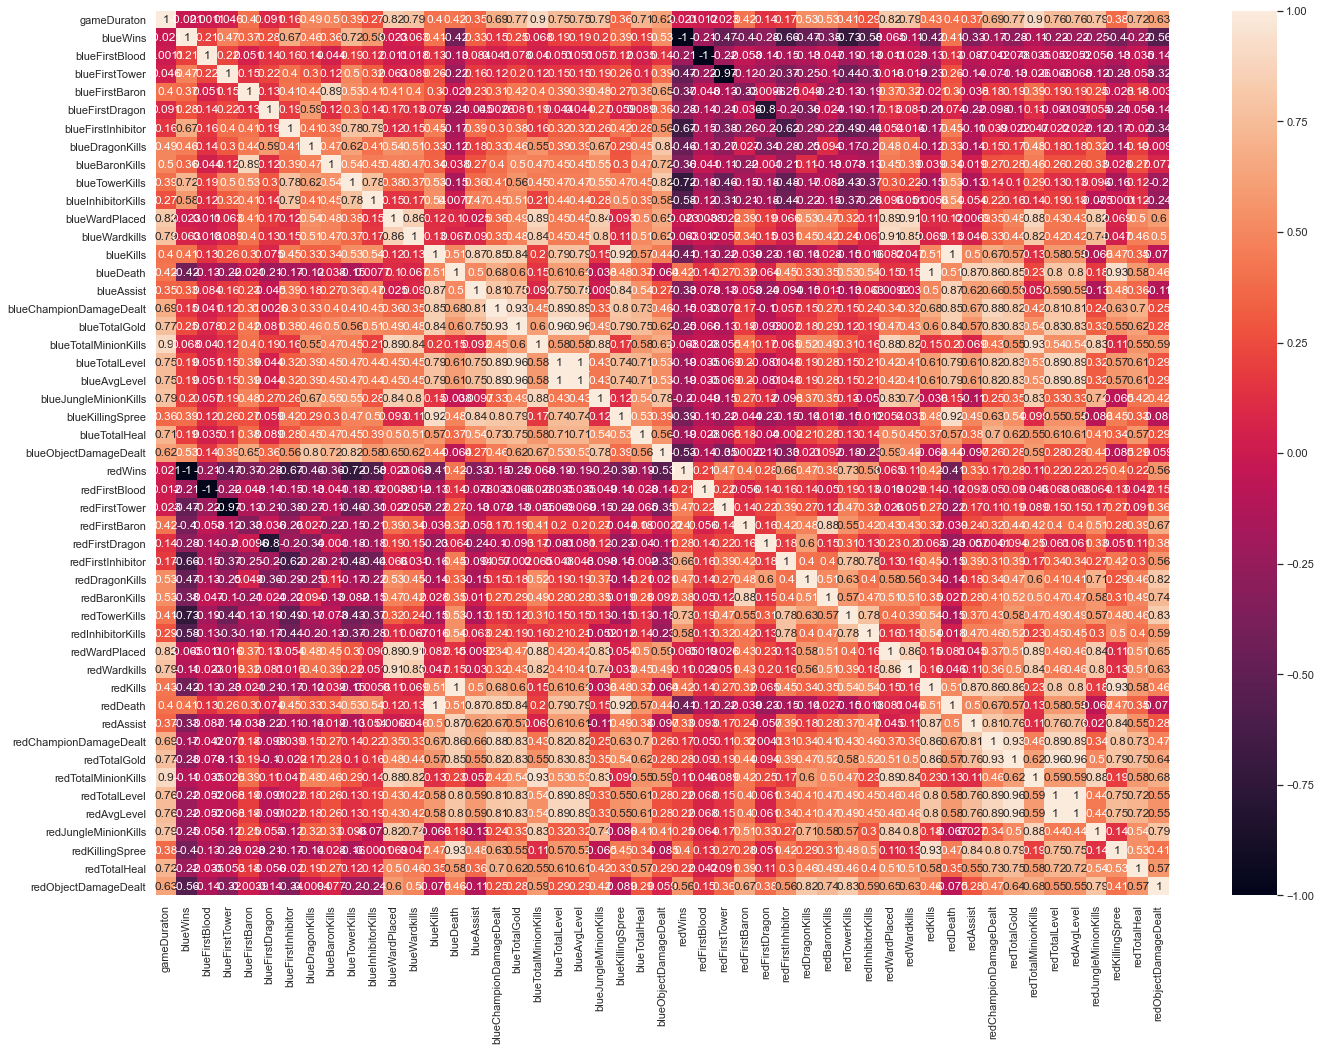

In [7]:
sns.set(rc={'figure.figsize':(22.7,16.27)})
ax = sns.heatmap(cor_matrix, annot=True)

In [8]:
cor_matrix > 0.5

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameDuraton,True,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,True,True
blueWins,False,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
blueFirstBlood,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueFirstTower,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueFirstBaron,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
blueFirstDragon,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
blueFirstInhibitor,False,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
blueDragonKills,False,False,False,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
blueBaronKills,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
blueTowerKills,False,True,False,False,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


Удалим признаки, которые сильно коррелируют с другими


In [9]:
new_data = data.drop(columns=['redWins', 'redFirstBlood', 'redFirstTower', 'redFirstDragon', 'blueAvgLevel', 'redAvgLevel'])
new_data

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1429,0,1,1,0,0,0,0,0,4,...,7,45,53831,41991,609,64,127,4,12916,26338
1,1313,0,0,1,0,0,0,0,0,3,...,6,43,52924,39672,510,63,133,4,12252,29828
2,1660,1,0,0,1,1,1,1,1,9,...,30,22,61745,46516,630,65,153,2,17005,37066
3,984,1,1,1,0,1,0,2,0,5,...,26,5,25007,21444,304,41,51,1,10499,3085
4,1437,0,1,1,0,1,0,2,0,3,...,19,39,71794,45798,565,68,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,2479,1,1,0,0,0,0,3,1,7,...,42,41,149798,72167,789,86,258,6,34890,62124
107121,932,0,0,0,0,0,0,0,0,0,...,5,26,37534,32931,364,51,110,5,11983,31400
107122,2081,0,1,1,0,0,0,1,0,6,...,25,68,97369,71576,797,85,222,8,33499,79612
107123,1619,0,0,0,0,0,0,1,0,2,...,23,68,116262,59001,524,72,162,11,52292,60903


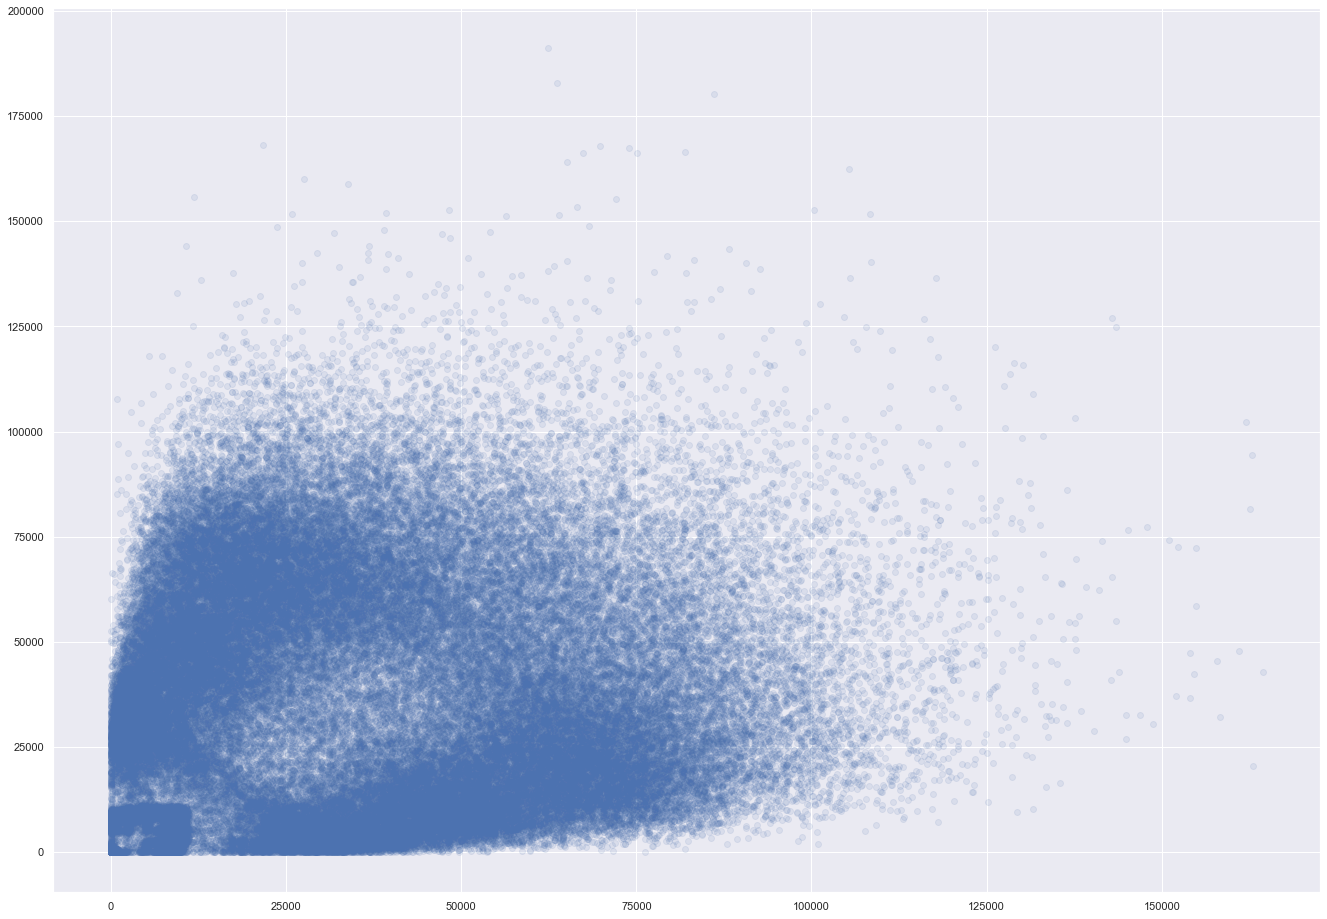

In [11]:
plt.scatter(data['blueObjectDamageDealt'], data['redObjectDamageDealt'], alpha = 0.1)

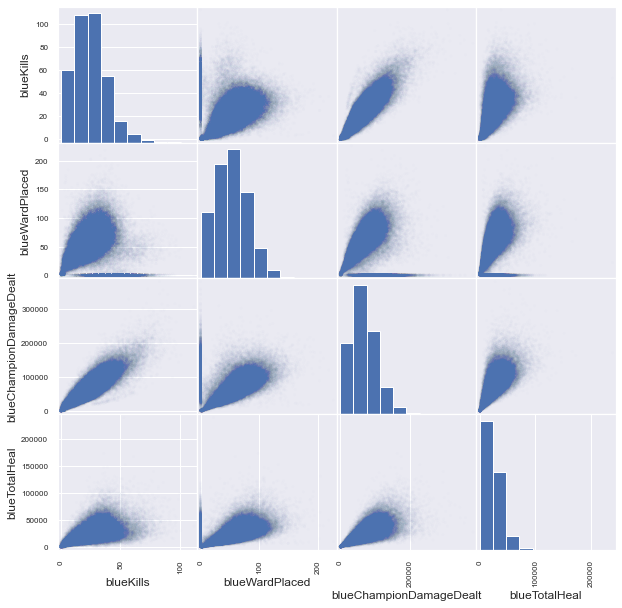

In [13]:
data1 = data.loc[:,['blueKills','blueWardPlaced','blueChampionDamageDealt','blueTotalHeal']]
scatter_matrix(data1, alpha = .01, figsize = (10, 10))
pass

## 3. Обработка пропущенных значений

In [14]:
new_data.isna().sum()

gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redFirstBaron              0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills              0
redInhibitorKills          0
redWardPlaced              0
redWardkills               0
redKills                   0
redDeath                   0
redAssist     

Нет пропущенных значений, вуху


## 4. Обработка категориальных признаков
Их нет, вуху.


## 5. Нормализация


In [15]:
data_norm = (new_data - new_data.mean(axis = 0)) / new_data.std(axis = 0)
data_norm.describe()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,...,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05,1.071250e+05
mean,-3.118781e-17,-2.176170e-15,-3.503399e-15,8.512688e-16,2.611591e-15,-2.300173e-15,1.452907e-14,2.461866e-15,-2.881667e-15,-7.507315e-16,...,-2.661336e-15,1.992981e-15,-1.683632e-16,-5.658225e-17,1.134189e-16,-1.476426e-15,5.183003e-16,-1.862764e-15,4.958461e-17,-4.019085e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.847556e+00,-9.903060e-01,-1.014144e+00,-1.027184e+00,-5.561381e-01,-8.302505e-01,-7.957520e-01,-1.081451e+00,-5.551011e-01,-1.277394e+00,...,-1.822481e+00,-1.381923e+00,-1.827137e+00,-2.909496e+00,-2.783911e+00,-4.265598e+00,-1.878152e+00,-1.562565e+00,-1.582681e+00,-1.364353e+00
25%,-7.147147e-01,-9.903060e-01,-1.014144e+00,-1.027184e+00,-5.561381e-01,-8.302505e-01,-7.957520e-01,-1.081451e+00,-5.551011e-01,-9.834345e-01,...,-7.216745e-01,-7.223329e-01,-7.515697e-01,-7.140033e-01,-6.618115e-01,-6.392613e-01,-6.196552e-01,-7.385479e-01,-7.253773e-01,-8.989117e-01
50%,-2.973129e-02,-9.903060e-01,9.860437e-01,9.735265e-01,-5.561381e-01,-8.302505e-01,-7.957520e-01,-2.858896e-01,-5.551011e-01,-1.015557e-01,...,-6.119031e-02,-1.668889e-01,-1.302777e-01,4.802148e-03,8.814509e-02,8.600607e-02,3.955752e-02,-1.892029e-01,-1.994027e-01,-1.627056e-01
75%,6.919067e-01,1.009779e+00,9.860437e-01,9.735265e-01,-5.561381e-01,1.204444e+00,1.256661e+00,5.096716e-01,1.313816e+00,7.803232e-01,...,5.992939e-01,4.579856e-01,5.780817e-01,6.841061e-01,6.992209e-01,6.794066e-01,6.837881e-01,6.348147e-01,5.041318e-01,7.568585e-01
max,5.326426e+00,1.009779e+00,9.860437e-01,9.735265e-01,1.798098e+00,1.204444e+00,1.256661e+00,4.487478e+00,6.920568e+00,1.956162e+00,...,6.396877e+00,6.429009e+00,7.255636e+00,5.701342e+00,4.648992e+00,5.294744e+00,5.433116e+00,6.402937e+00,1.059101e+01,5.707819e+00


## 6. Разбитие выборки


In [16]:
x = data_norm.drop(['blueWins'], axis=1)
y = data['blueWins']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=42)

In [17]:
N_train, _ = x_train.shape 
N_test,  _ = x_test.shape 

N_train, N_test

(80343, 26782)

## 7.-8. Метод ближайщих соседей и ошибки


In [20]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
train_er = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
test_er = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
print(f"Train metrics: {train_er}, Test metrics: {test_er}")

Train metrics: 0.01589435296167681, Test metrics: 0.02580091105966694


In [21]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=8)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
train_er = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
test_er = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
print(f"Train metrics: {train_er}, Test metrics: {test_er}")

Train metrics: 0.018234320351492975, Test metrics: 0.024643417220521244


## 9. Другие классификаторы


In [22]:
gbt = sklearn.ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(x_train, y_train)

train_er = np.mean(y_train != gbt.predict(x_train))
test_er = np.mean(y_test != gbt.predict(x_test))

print(train_er, test_er)

0.011226864817096697 0.013217832872825032


In [23]:
gbt = sklearn.ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(x_train, y_train)

train_er = np.mean(y_train != gbt.predict(x_train))
test_er = np.mean(y_test != gbt.predict(x_test))

print(train_er, test_er)

0.011226864817096697 0.013217832872825032


In [24]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

train_er = np.mean(y_train != rf.predict(x_train))
test_er  = np.mean(y_test  != rf.predict(x_test))

print(train_er, test_er)

0.0 0.012433724143081174
